### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# code to ignore warnings
import warnings
warnings.filterwarnings("ignore")

root_csv = '../csv files/'
root_pickle = '../pickle files/'

### Reading files

In [2]:
df_diab_total_pivot = pd.read_pickle(root_pickle +'Diabetes_Total_Pivot.pkl')
df_diab_gender_pivot = pd.read_pickle(root_pickle +'Diabetes_Gender_Pivot.pkl')
df_diab_age_pivot = pd.read_pickle(root_pickle +'Diabetes_Age_Pivot.pkl')

### Reviewing data

In [3]:
df_diab_total_pivot.head(5)

,State,County,CountyFIPS,Year,Total Absolute,Total Percentage,Grocery Tax,Restaurant Tax,tax_delta,Population
0,Alabama,Autauga County,1001,2004,2470.0,7.5,0.04,0.04,0.0,32933.333333
6,Alabama,Autauga County,1001,2005,3010.0,8.9,0.04,0.04,0.0,33820.226169
12,Alabama,Autauga County,1001,2006,3482.0,10.0,0.04,0.04,0.0,34820.000000
18,Alabama,Autauga County,1001,2007,3332.0,9.4,0.04,0.04,0.0,35446.809949
24,Alabama,Autauga County,1001,2008,3563.0,9.9,0.04,0.04,0.0,35989.900377


In [4]:
df_diab_gender_pivot.head(5)

,State,County,CountyFIPS,Year,Gender Absolute,Gender Percentage,Gender,Grocery Tax,Restaurant Tax,tax_delta,Population
0,Alabama,Autauga County,1001,2004,1281.0,7.4,Female,0.04,0.04,0.0,17310.810588
3,Alabama,Autauga County,1001,2004,1189.0,7.6,Male,0.04,0.04,0.0,15644.737038
6,Alabama,Autauga County,1001,2005,1523.0,8.6,Female,0.04,0.04,0.0,17709.301540
9,Alabama,Autauga County,1001,2005,1487.0,9.3,Male,0.04,0.04,0.0,15989.246984
12,Alabama,Autauga County,1001,2006,1758.0,9.7,Female,0.04,0.04,0.0,18123.711697


In [5]:
df_diab_age_pivot.head(5)

,State,County,CountyFIPS,Year,Age Diabetics Absolute,Age Diabetics Percentage,Age,Grocery Tax,Restaurant Tax,tax_delta,Population
0,Alabama,Autauga County,1001,2004,472.0,2.900000,20-44,0.04,0.04,0.0,16275.861534
1,Alabama,Autauga County,1001,2004,1179.0,10.300000,45-64,0.04,0.04,0.0,11446.601730
2,Alabama,Autauga County,1001,2004,819.0,16.299999,65-beyond,0.04,0.04,0.0,5024.540112
6,Alabama,Autauga County,1001,2005,582.0,3.500000,20-44,0.04,0.04,0.0,16628.571429
7,Alabama,Autauga County,1001,2005,1458.0,12.300000,45-64,0.04,0.04,0.0,11853.658353


### Regression Analysis at County level data

#### 1. Baseline without controls

##### a. With Total Percentage as Response Variable:

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'Grocery Tax' and 'Restaurant Tax' are the features
X = df_diab_total_pivot['tax_delta']
y = df_diab_total_pivot['Total Percentage']

# Add a constant term to the features matrix (required for statsmodels)
X = sm.add_constant(X)

# Create and fit the linear regression model using statsmodels
stats_model = sm.OLS(y, X).fit()

# Print the summary
print(stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Total Percentage   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     256.0
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           1.70e-57
Time:                        16:20:42   Log-Likelihood:            -1.1303e+05
No. Observations:               53318   AIC:                         2.261e+05
Df Residuals:                   53316   BIC:                         2.261e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5713      0.016    582.923      0.0

##### Conclusions:
The baseline model with response as total percentage of diabetics and predictor variables grocery tax and restaurant tax:
- One percent increase in tax delta, keeping all other constant, decreases the percentage of diabetics by 5.58%
- p-value is close to 0 in both cases. Hence the coefficients of regression are statistically significant
- Adjusted R-square is 0.005 indicating that the model can explain only 0.5% of variation in total number of diabetics patient
- This model was fitted without taking into account affects of other factors such as age, gender, ethinicity etc.

#### 2. With single controls

##### a. Gender Control - On Percentage

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# One Hot Encoding Gender in predictor variable
X = pd.get_dummies(df_diab_gender_pivot[['tax_delta', 'Gender']], columns=['Gender'], drop_first=True)
y = df_diab_gender_pivot['Gender Percentage']

# Add a constant term to the features matrix (required for statsmodels)
X = sm.add_constant(X)

# Create and fit the linear regression model using statsmodels
stats_model = sm.OLS(y, X).fit()

# Print the summary
print(stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Gender Percentage   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1999.
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:20:42   Log-Likelihood:            -2.2808e+05
No. Observations:              106631   AIC:                         4.562e+05
Df Residuals:                  106628   BIC:                         4.562e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.2056      0.013    686.931      

##### Conclusion:
The model with response as total number of diabetics and predictor variables grocery tax and restaurant tax and control on gender:
- One percent increase in tax delta, keeping all other constant, increases the percentage by 5.52%
- If the gender is male, keeping all other constant, the percentage increases by 0.75%.
- p-value of all regression coefficients are statistically significant. 
- Adjusted R-square is 0.036 indicating that the model can explain only 3.6% of variation in total percentage of diabetics patient.

##### b. Age Control - On Percentage

In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# One Hot Encoding Gender in predictor variable
X = pd.get_dummies(df_diab_age_pivot[['tax_delta', 'Age']], columns=['Age'], drop_first=True)
y = df_diab_age_pivot['Age Diabetics Percentage']

# Add a constant term to the features matrix (required for statsmodels)
X = sm.add_constant(X)

# Create and fit the linear regression model using statsmodels
stats_model = sm.OLS(y, X).fit()

# Print the summary
print(stats_model.summary())

                               OLS Regression Results                               
Dep. Variable:     Age Diabetics Percentage   R-squared:                       0.863
Model:                                  OLS   Adj. R-squared:                  0.863
Method:                       Least Squares   F-statistic:                 3.332e+05
Date:                      Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                              16:20:42   Log-Likelihood:            -3.6687e+05
No. Observations:                    158645   AIC:                         7.338e+05
Df Residuals:                        158641   BIC:                         7.338e+05
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

##### Conclusion:
The model with response as percentage of diabetics and predictor variables grocery tax and restaurant tax and control on age:
- One percent increase in tax delta, keeping all other constant, decreases the percentage by 7.43%
- If the age is between 45-64, keeping all other constant, the percentage increases by 8.54%.
- If the age is between 65-beyond, keeping all other constant, the percentage increases by 15.01%.
- All p values are statistically significant
- Adjusted R-square is 0.863 indicating that the model can explain only 86.3% of variation in percentage of diabetics patient
- There is a significant increase in R-square. Since we fit linear model, we will have to validate its assumptions

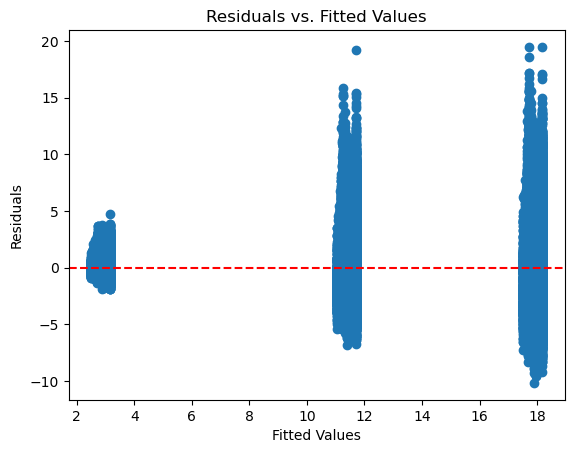

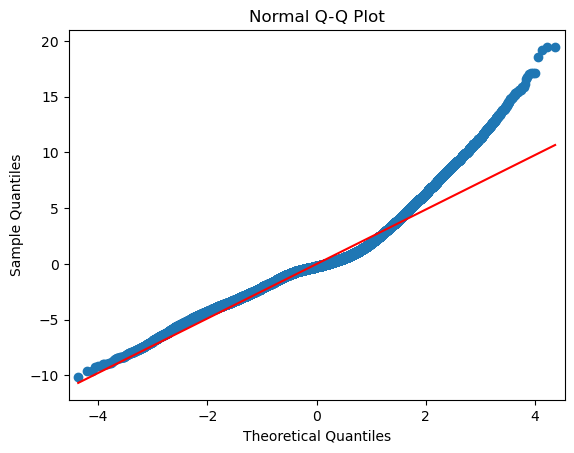

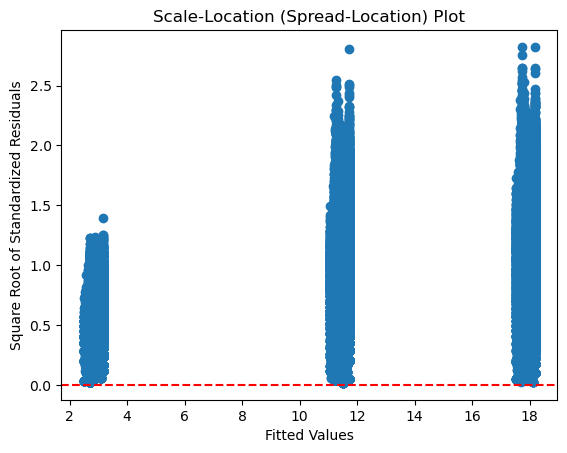

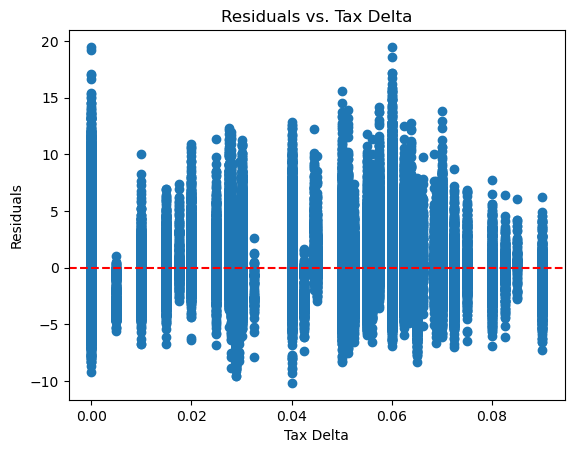

In [9]:
# Checking linearity assumptions

import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Assuming you have already fitted the linear regression model named 'model'

# Get fitted values and residuals
fitted_values = stats_model.fittedvalues
residuals = stats_model.resid

# 1. Residuals vs. Fitted Values Plot
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# 2. Normal Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q Plot')
plt.show()

# 3. Scale-Location (Spread-Location) Plot
sqrt_standardized_residuals = np.sqrt(np.abs(stats_model.get_influence().resid_studentized_internal))
plt.scatter(fitted_values, sqrt_standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Square Root of Standardized Residuals')
plt.title('Scale-Location (Spread-Location) Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# 4. Residuals vs. Predictor Plot for 'Grocery Tax'
plt.scatter(df_diab_age_pivot['Population'], residuals)
plt.xlabel('Population')
plt.ylabel('Residuals')
plt.title('Residuals vs. Tax Delta')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

##### Conclusions:
For the control model with age on response variable percentage diabetics, we observe that the assumptions are violated. Hence, we are applying transformation to provide remedy.

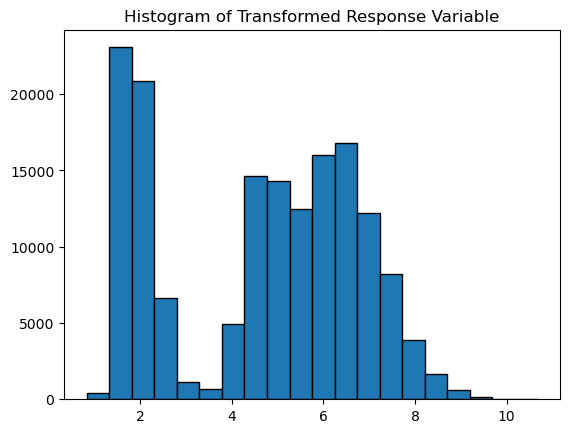

Lambda Value: 0.5100811843716125
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 5.209e+05
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:20:48   Log-Likelihood:            -1.5384e+05
No. Observations:              158645   AIC:                         3.077e+05
Df Residuals:                  158641   BIC:                         3.077e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const        

In [10]:
#### Applying the Box-Cox transformation

# Apply Box-Cox Transformation to Response Variable
y_transformed, lambda_value = stats.boxcox(y + 1)  # Adding 1 to handle zero values

# Visualize the Transformed Response Variable
plt.hist(y_transformed, bins=20, edgecolor='black')
plt.title('Histogram of Transformed Response Variable')
plt.show()

# Check Lambda Value
print(f'Lambda Value: {lambda_value}')

# Fit a new model using the transformed response variable
stats_model_transformed = sm.OLS(y_transformed, X).fit()

# Print the summary of the transformed model
print(stats_model_transformed.summary())

##### Conclusions:
- The lambda value of transformation is 0.51
- For this lambda value, the model response variable (y) = % diabetics is now transformed to (((y^0.51)-1)/0.51) or (((% diabetics^0.51)-1)/0.51)
- This changes some of the inferences.
##### New Inferences:
- A one unit increase in restaurant tax decreases transformed y by 2.18%
- If the age bucket is 45-65, there is an increase in transformed y by 3.15%
- If the age bucket is 65-beyond, there is an increase in transformed y by 4.85%
- Adj R-square is 90.8% indicating the model explains 90.8% variability in transformed y.

##### c. Total Population Control - On Percentage

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'Grocery Tax' and 'Restaurant Tax' are the features
X = df_diab_total_pivot[['tax_delta','Population']]
y = df_diab_total_pivot['Total Percentage']

# Add a constant term to the features matrix (required for statsmodels)
X = sm.add_constant(X)

# Create and fit the linear regression model using statsmodels
stats_model = sm.OLS(y, X).fit()

# Print the summary
print(stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Total Percentage   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     194.0
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           1.12e-84
Time:                        16:20:48   Log-Likelihood:            -1.1297e+05
No. Observations:               53318   AIC:                         2.259e+05
Df Residuals:                   53315   BIC:                         2.260e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5825      0.016    583.281      0.0

##### Conclusion:
The model with response as % of diabetics and predictor variable tax and population:
- One percent increase in tax delta, keeping all other constant, increases the diabetics % by 5.07. 
- One unit increase in population, keeping all other constant, decreases the diabetics % by 4.288 x 10^-7. 
- All p-value are statistically significant
- Adjusted R-square is 0.007 indicating that the model can explain only 0.7% of variation in total % of diabetics patient
- The conditional number is large and hence we need to check for multicollinearity
- We need to validate the linearity assumptions and if any is violated, apply necessary transformation.

In [12]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Check the VIF values
print(vif_data)

     Variable       VIF
0       const  3.549673
1   tax_delta  1.016137
2  Population  1.016137


##### Inference:
The VIF for predictor variables is small and hence multicollinearity does not exist

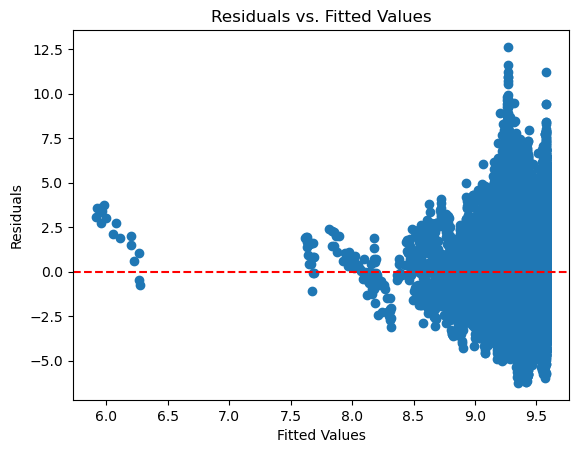

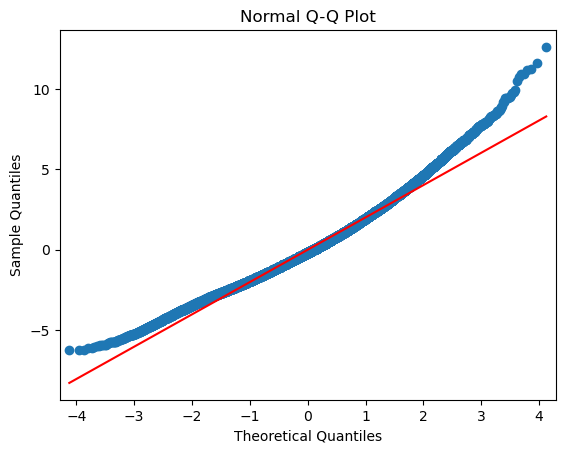

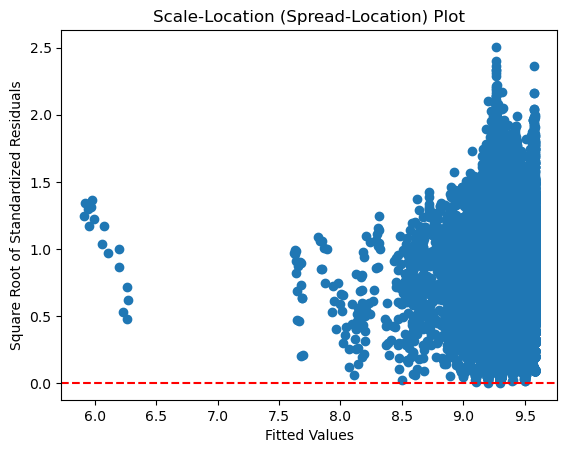

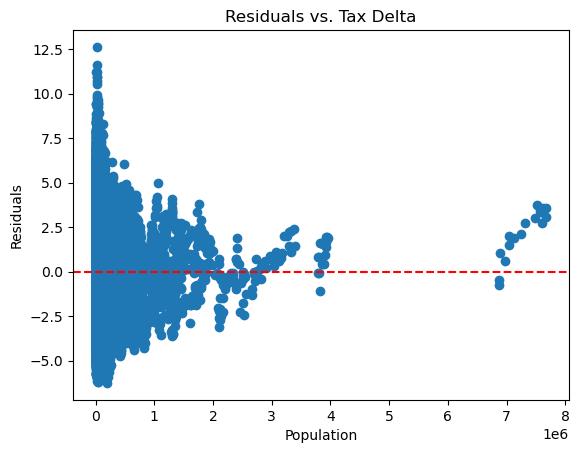

In [13]:
# Validating for linearity assumptions 

import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Assuming you have already fitted the linear regression model named 'model'

# Get fitted values and residuals
fitted_values = stats_model.fittedvalues
residuals = stats_model.resid

# 1. Residuals vs. Fitted Values Plot
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# 2. Normal Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q Plot')
plt.show()

# 3. Scale-Location (Spread-Location) Plot
sqrt_standardized_residuals = np.sqrt(np.abs(stats_model.get_influence().resid_studentized_internal))
plt.scatter(fitted_values, sqrt_standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Square Root of Standardized Residuals')
plt.title('Scale-Location (Spread-Location) Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# 4. Residuals vs. Predictor Plot for ''
plt.scatter(df_diab_total_pivot['Population'], residuals)
plt.xlabel('Population')
plt.ylabel('Residuals')
plt.title('Residuals vs. Tax Delta')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

##### Since the above model violates linearity assumptions, applying Box-Cox transformation

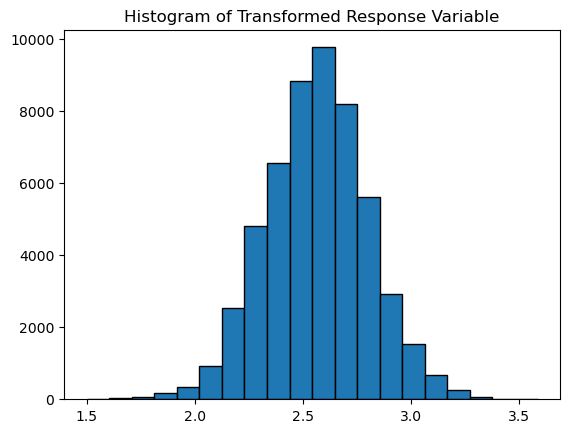

Lambda Value: 0.08513380502286896
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     173.6
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           7.32e-76
Time:                        16:20:51   Log-Likelihood:                 1462.5
No. Observations:               53318   AIC:                            -2919.
Df Residuals:                   53315   BIC:                            -2892.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5

In [14]:
# Applying the Box-Cox transformation

# Apply Box-Cox Transformation to Response Variable
y_transformed, lambda_value = stats.boxcox(y + 1)  # Adding 1 to handle zero values

# Visualize the Transformed Response Variable
plt.hist(y_transformed, bins=20, edgecolor='black')
plt.title('Histogram of Transformed Response Variable')
plt.show()

# Check Lambda Value
print(f'Lambda Value: {lambda_value}')

# Fit a new model using the transformed response variable
stats_model_transformed = sm.OLS(y_transformed, X).fit()

# Print the summary of the transformed model
print(stats_model_transformed.summary())

##### Since, we do not get a good R-square value, even after fixing assumtpions by transforming, we drop further investigation.

#### 3. With multiple controls

##### a. Total Population and Gender - On Percentage

In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'Grocery Tax' and 'Restaurant Tax' are the features
X = pd.get_dummies(df_diab_gender_pivot[['tax_delta','Population', 'Gender']], columns=['Gender'], drop_first=True)
y = df_diab_gender_pivot['Gender Percentage']

# Add a constant term to the features matrix (required for statsmodels)
X = sm.add_constant(X)

# Create and fit the linear regression model using statsmodels
stats_model = sm.OLS(y, X).fit()

# Print the summary
print(stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Gender Percentage   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1420.
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:20:51   Log-Likelihood:            -2.2795e+05
No. Observations:              106631   AIC:                         4.559e+05
Df Residuals:                  106627   BIC:                         4.560e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.2178      0.013    687.531      

##### Conclusion:
The model with response as % of diabetics and predictor variable tax delta and population:
- One percent increase in tax delta, keeping all other constant, decreases the diabetics % by 5.01%. 
- One unit increase in population, keeping all other constant, decreases the diabetics number by 8.58x10^-7 
- Adjusted R-square is 0.038 indicating that the model can explain only 3.8% of variation in diabetics %
- The conditional number is large and hence we need to check for multicollinearity

In [16]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Check the VIF values
print(vif_data)

      Variable       VIF
0        const  4.551653
1    tax_delta  1.016115
2   Population  1.016197
3  Gender_Male  1.000082


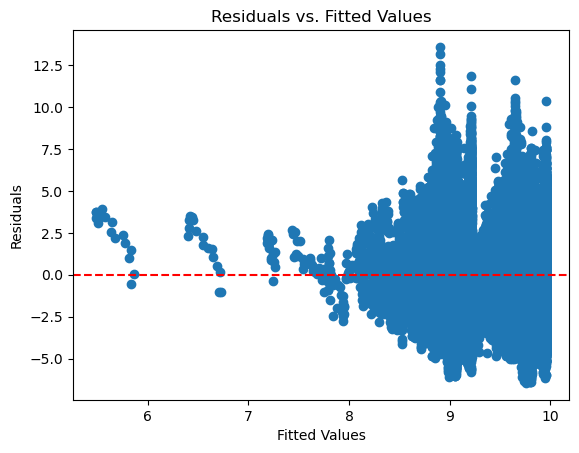

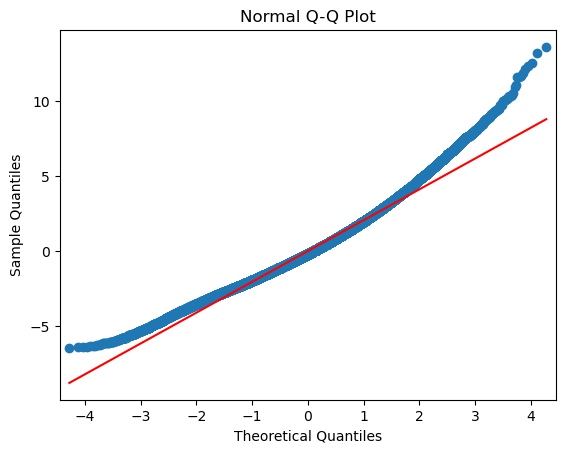

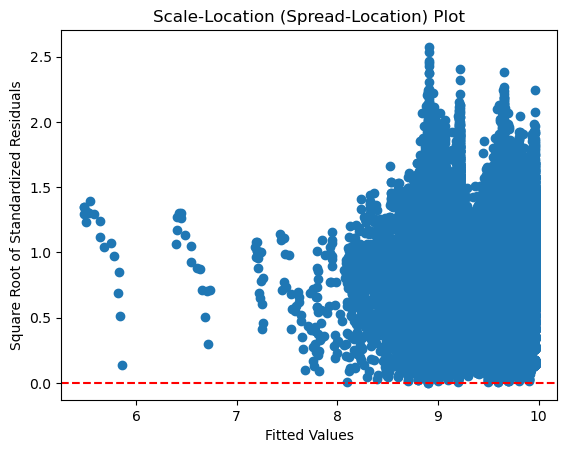

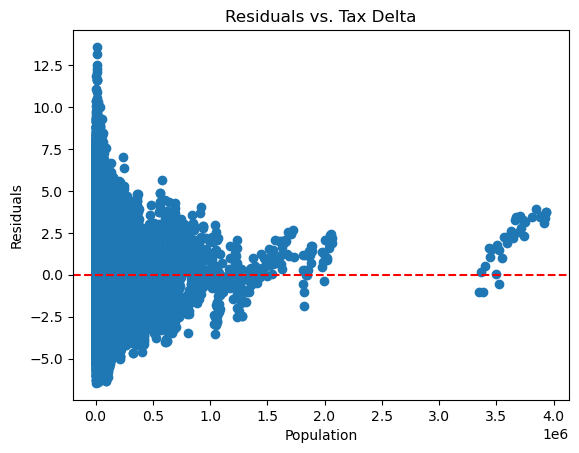

In [17]:
# Validating for linearity assumptions 

import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Assuming you have already fitted the linear regression model named 'model'

# Get fitted values and residuals
fitted_values = stats_model.fittedvalues
residuals = stats_model.resid

# 1. Residuals vs. Fitted Values Plot
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# 2. Normal Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q Plot')
plt.show()

# 3. Scale-Location (Spread-Location) Plot
sqrt_standardized_residuals = np.sqrt(np.abs(stats_model.get_influence().resid_studentized_internal))
plt.scatter(fitted_values, sqrt_standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Square Root of Standardized Residuals')
plt.title('Scale-Location (Spread-Location) Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# 4. Residuals vs. Predictor Plot for ''
plt.scatter(df_diab_gender_pivot['Population'], residuals)
plt.xlabel('Population')
plt.ylabel('Residuals')
plt.title('Residuals vs. Tax Delta')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

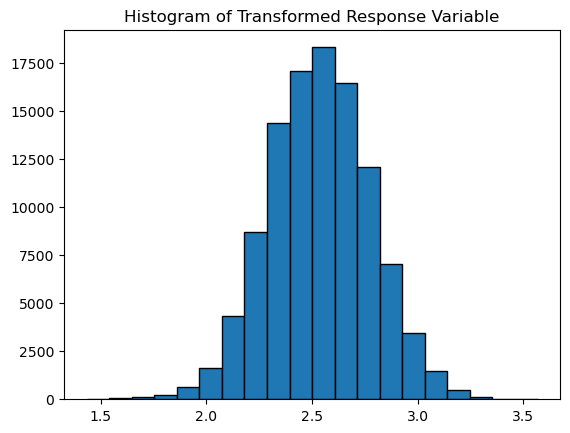

Lambda Value: 0.07576771896055827
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1464.
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:20:55   Log-Likelihood:                 3444.2
No. Observations:              106631   AIC:                            -6880.
Df Residuals:                  106627   BIC:                            -6842.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           

In [18]:
# Applying the Box-Cox transformation

# Apply Box-Cox Transformation to Response Variable
y_transformed, lambda_value = stats.boxcox(y + 1)  # Adding 1 to handle zero values

# Visualize the Transformed Response Variable
plt.hist(y_transformed, bins=20, edgecolor='black')
plt.title('Histogram of Transformed Response Variable')
plt.show()

# Check Lambda Value
print(f'Lambda Value: {lambda_value}')

# Fit a new model using the transformed response variable
stats_model_transformed = sm.OLS(y_transformed, X).fit()

# Print the summary of the transformed model
print(stats_model_transformed.summary())

##### Conclusion:
Since Adj. R square of this model is low, we will ignore further discussion

##### b. Total Population and Age - On Percentage

In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'Grocery Tax' and 'Restaurant Tax' are the features
X = pd.get_dummies(df_diab_age_pivot[['tax_delta', 'Population','Age']], columns=['Age'], drop_first=True)
y = df_diab_age_pivot['Age Diabetics Percentage']

# Add a constant term to the features matrix (required for statsmodels)
X = sm.add_constant(X)

# Create and fit the linear regression model using statsmodels
stats_model = sm.OLS(y, X).fit()

# Print the summary
print(stats_model.summary())

                               OLS Regression Results                               
Dep. Variable:     Age Diabetics Percentage   R-squared:                       0.863
Model:                                  OLS   Adj. R-squared:                  0.863
Method:                       Least Squares   F-statistic:                 2.503e+05
Date:                      Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                              16:20:55   Log-Likelihood:            -3.6675e+05
No. Observations:                    158645   AIC:                         7.335e+05
Df Residuals:                        158640   BIC:                         7.336e+05
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

##### Conclusion:
The model with response as % of diabetics and predictor variable tax delta and population:
- One percent increase in tax delta, keeping all other constant, decreases the diabetics % by 7.89. 
- One unit increase in population, keeping all other constant, increases the diabetics % by 1.13x10^-6 
- Adjusted R-square is 0.863 indicating that the model can explain only 86.3% of variation in % diabetics
- The conditional number is large and hence we need to check for multicollinearity
- This model has good R-square value but we need to validate the linearity assumptions and if any is violated, apply necessary trasformation

In [20]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Check the VIF values
print(vif_data)

        Variable       VIF
0          const  5.659033
1      tax_delta  1.013754
2     Population  1.023592
3      Age_45-64  1.346559
4  Age_65-beyond  1.357166


##### Inference:
The VIF for predictor variables is small and hence multicollinearity does not exist

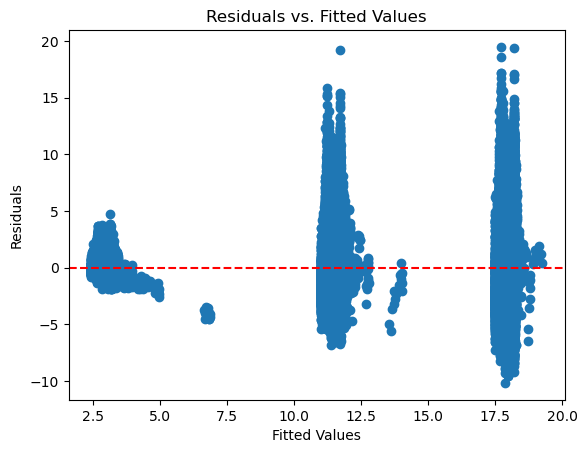

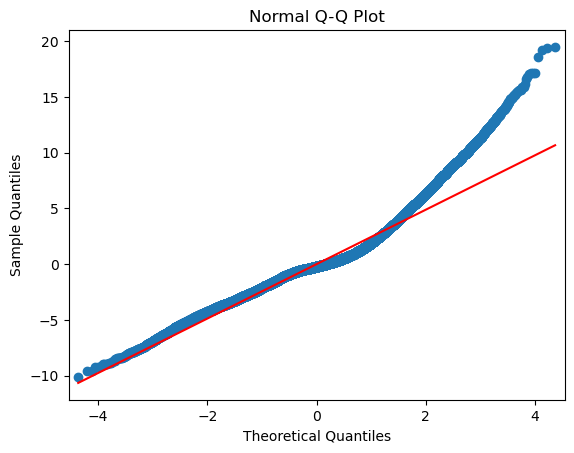

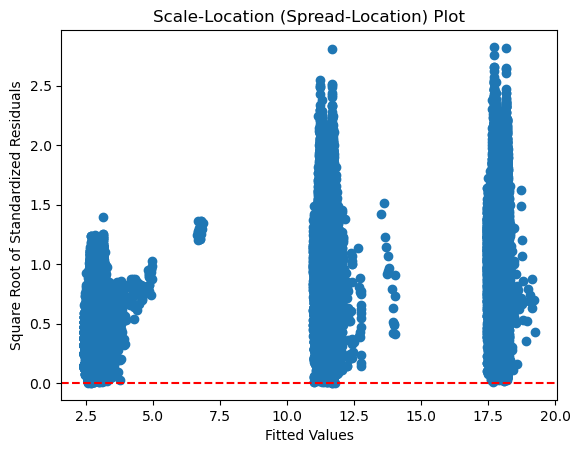

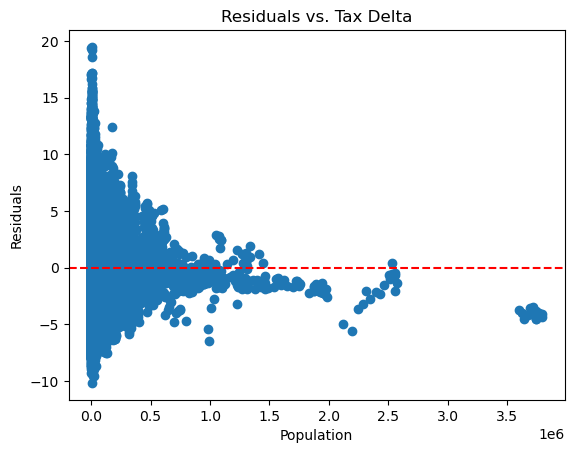

In [21]:
# Validating for linearity assumptions 

import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Assuming you have already fitted the linear regression model named 'model'

# Get fitted values and residuals
fitted_values = stats_model.fittedvalues
residuals = stats_model.resid

# 1. Residuals vs. Fitted Values Plot
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# 2. Normal Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q Plot')
plt.show()

# 3. Scale-Location (Spread-Location) Plot
sqrt_standardized_residuals = np.sqrt(np.abs(stats_model.get_influence().resid_studentized_internal))
plt.scatter(fitted_values, sqrt_standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Square Root of Standardized Residuals')
plt.title('Scale-Location (Spread-Location) Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# 4. Residuals vs. Predictor Plot for ''
plt.scatter(df_diab_age_pivot['Population'], residuals)
plt.xlabel('Population')
plt.ylabel('Residuals')
plt.title('Residuals vs. Tax Delta')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

##### Since the above model violates linearity assumptions, applying Box-Cox transoformation

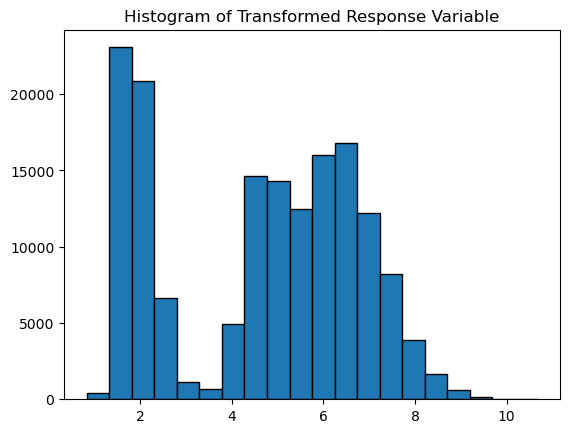

Lambda Value: 0.5100811843716125
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 3.916e+05
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:21:01   Log-Likelihood:            -1.5367e+05
No. Observations:              158645   AIC:                         3.074e+05
Df Residuals:                  158640   BIC:                         3.074e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const        

In [22]:
# Applying the Box-Cox transformation

# Apply Box-Cox Transformation to Response Variable
y_transformed, lambda_value = stats.boxcox(y + 1)  # Adding 1 to handle zero values

# Visualize the Transformed Response Variable
plt.hist(y_transformed, bins=20, edgecolor='black')
plt.title('Histogram of Transformed Response Variable')
plt.show()

# Check Lambda Value
print(f'Lambda Value: {lambda_value}')

# Fit a new model using the transformed response variable
stats_model_transformed = sm.OLS(y_transformed, X).fit()

# Print the summary of the transformed model
print(stats_model_transformed.summary())

##### Conclusion:
The model with response as number of diabetics and predictor variable tax delta and population:
- The lambda value is 0.51. Indicating the new model fit is on (((% diabetics^0.51)-1)/0.51). We will call this response as transformed y. 
- One percent increase in tax delta, keeping all other constant, decreases the transformed y by 2.31
- One unit increase in  population, keeping all other constant, increases the transformed y by 3.47x!0^-7. 
- All p-value are statistically significant
- Adjusted R-square is 0.908 indicating that the model can explain only 90.8% of variation in % diabetics
- Conditonal large number error can be fixed by scaling

In [23]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import pandas as pd

df_diab_scaled = df_diab_age_pivot.reset_index(drop=True)
df_diab_scaled

# Extract the independent variables (features) from your DataFrame
X = pd.get_dummies(df_diab_scaled[['tax_delta','Population', 'Age']], columns=['Age'], drop_first=True)
# Extract the dependent variable from your DataFrame
y = df_diab_scaled['Age Diabetics Percentage']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the independent variables
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Add a constant term to the independent variables
X_scaled_df = sm.add_constant(X_scaled_df)

# Fit the linear regression model
model = sm.OLS(y, X_scaled_df).fit()

# Display the summary
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Age Diabetics Percentage   R-squared:                       0.863
Model:                                  OLS   Adj. R-squared:                  0.863
Method:                       Least Squares   F-statistic:                 2.503e+05
Date:                      Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                              16:21:01   Log-Likelihood:            -3.6675e+05
No. Observations:                    158645   AIC:                         7.335e+05
Df Residuals:                        158640   BIC:                         7.336e+05
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

##### Since the above model violates linearity assumptions, applying Box-Cox transformation to scaled parameters

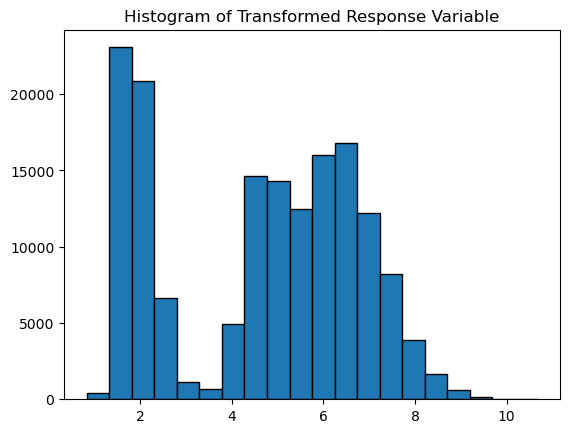

Lambda Value: 0.5100811843716125
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 3.916e+05
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:21:02   Log-Likelihood:            -1.5367e+05
No. Observations:              158645   AIC:                         3.074e+05
Df Residuals:                  158640   BIC:                         3.074e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const        

In [24]:
# Applying the Box-Cox transformation

# Apply Box-Cox Transformation to Response Variable
y_transformed, lambda_value = stats.boxcox(y + 1)  # Adding 1 to handle zero values

# Visualize the Transformed Response Variable
plt.hist(y_transformed, bins=20, edgecolor='black')
plt.title('Histogram of Transformed Response Variable')
plt.show()

# Check Lambda Value
print(f'Lambda Value: {lambda_value}')

# Fit a new model using the transformed response variable
stats_model_transformed = sm.OLS(y_transformed, X_scaled_df).fit()

# Print the summary of the transformed model
print(stats_model_transformed.summary())

##### Conclusion:
The model with response as number of diabetics and predictor variable tax delta and population:
- The lambda value is 0.51. Indicating the new model fit is on (((% diabetics^0.51)-1)/0.51). We will call this response as transformed y. 
- One percent increase in scaled tax delta, keeping all other constant, decreases the transformed y by 0.058
- One unit increase in  scaled population, keeping all other constant, increases the transformed y by 0.03. 
- All p-value are statistically significant
- Adjusted R-square is 0.908 indicating that the model can explain only 90.8% of variation in % diabetics

### Final Conclusion:
- The best model for Diabetics % variation with Tax Delta, after accounting for necessary controls and corrections of assumptions, is the model with response, (((% diabetics^0.51)-1)/0.51); and scaled predictor grocery tax, restaurant tax, population and age control
- This model explains for 90.8% variability in diabetics %

### Study Conclusion:
- The model with percentage diabetics as response is better than absolute diabetics. The Adj R square value is better in diabetics %
- The model with percentage diabetics has similar Adj R square when 
a. The model with tax is fitted with controls on age and population
b. The model with tax delta is fitted with controls on age and population
- The model with tax delta is more relevant to our study as we want to see the impact of relative changes in restaurant and grocery tax on health viz a viz diabetics %
- This model has good Adj R square and has predictors as scaled tax delta, scaled age and scaled population and response as transformed diabetics % i.e. (((% diabetics^0.51)-1)/0.51)
- This model explains the following in our study:
"One percent increase in tax delta, keeping all other constant (i.e. age, population), decreases the transformed y by 0.058"
i.e. as Tax Delta increases the diabetics % decreases (not linearly though). In other words, if restaurant tax is increased and grocery tax is decreased then resultant tax delta increases and hence diabetics % decreases, keeping all others constant and this change is not linear in nature.
